<a href="https://colab.research.google.com/github/SSanjey/ssanjey.github.io/blob/main/Q1)Us_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


Trends in the U.S. Population
Dataset: "Annual Estimates of the Resident Population by Single Year of Age and Sex for the United States."

Link: https://raw.githubusercontent.com/flaviovdf/evcomp2018/master/data/nc-est2015-agesex-res.csv

The percent change jumps from about 3% for the overall population to almost 30% for the people in their late sixties and early seventies. This stunning change contributes to what is known as the graying of America. By far the greatest absolute change was among those in the 64-67 age group in 2014. What could explain this large increase? We can explore this question by examining the years in which the relevant groups were born. Those who were in the 64-67 age group in 2010 were born in the years 1943 to 1946.The attack on Pearl Harbor was in late 1941, and by 1942 U.S. forces were heavily engaged in a massive war that ended in 1945.Those who were 64 to 67 years old in 2014 were born in the years 1947 to 1950, at the height of the post-WWII baby boom in the United States. The post-war jump in births is the major reason for the large changes observed.

In [ ]:
# 1.Read the csv file as DataFrame

# https://raw.githubusercontent.com/flaviovdf/evcomp2018/master/data/nc-est2015-agesex-res.csv

df = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/evcomp2018/master/data/nc-est2015-agesex-res.csv')


In [ ]:
df.columns

Index(['SEX', 'AGE', 'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015'],
      dtype='object')

In [ ]:
#2.Find Size

print("Shape:", df.shape)
print("Size:", df.size)

Shape: (306, 10)
Size: 3060


In [ ]:
#3.Describe the data

df.describe(include='all')

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
count,306.000000,306.000000,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02
mean,1.000000,59.303922,4.035889e+06,4.036054e+06,4.043750e+06,4.074756e+06,4.105917e+06,4.136306e+06,4.168724e+06,4.201553e+06
std,0.817834,98.060950,2.140881e+07,2.140968e+07,2.145038e+07,2.161430e+07,2.177900e+07,2.193965e+07,2.211105e+07,2.228462e+07
min,0.000000,0.000000,6.073000e+03,6.075000e+03,6.104000e+03,6.606000e+03,7.459000e+03,8.159000e+03,8.951000e+03,9.577000e+03
25%,0.000000,25.000000,9.987065e+05,9.987415e+05,1.010409e+06,1.045244e+06,1.073482e+06,1.121864e+06,1.156036e+06,1.162476e+06
50%,1.000000,50.500000,2.045286e+06,2.045342e+06,2.047912e+06,2.051284e+06,2.054609e+06,2.050533e+06,2.060284e+06,2.062285e+06
75%,2.000000,76.000000,2.304370e+06,2.304525e+06,2.304142e+06,2.321829e+06,2.335085e+06,2.349450e+06,2.387392e+06,2.415332e+06
max,2.000000,999.000000,3.087455e+08,3.087581e+08,3.093469e+08,3.117189e+08,3.141026e+08,3.164274e+08,3.189074e+08,3.214188e+08


In [ ]:
# 4.Re-label column years as “2014” and “2010”

columns = {
    "POPESTIMATE2010": "2010",
    "POPESTIMATE2014": "2014"
}

df = df.rename(columns=columns)

analysis_df = df[['SEX', 'AGE', '2010', '2014']]
analysis_df

,SEX,AGE,2010,2014
0,0,0,3951330,3949775
1,0,1,3957888,3949776
2,0,2,4090862,3959664
3,0,3,4111920,4007079
4,0,4,4077551,4005716
...,...,...,...,...
301,2,97,54118,62779
302,2,98,37532,46208
303,2,99,26074,32517
304,2,100,45058,58008


In [ ]:
#5. Display first 10 rows.

analysis_df.head(10)

,SEX,AGE,2010,2014
0,0,0,3951330,3949775
1,0,1,3957888,3949776
2,0,2,4090862,3959664
3,0,3,4111920,4007079
4,0,4,4077551,4005716
5,0,5,4064653,4006900
6,0,6,4073013,4135930
7,0,7,4043046,4155326
8,0,8,4025604,4120903
9,0,9,4125415,4108349


In [ ]:
# 6.Select 15th and 22nd rows.

analysis_df.iloc[[15, 22]]

,SEX,AGE,2010,2014
15,0,15,4231002,4164796
22,0,22,4287005,4615729


In [ ]:
# 7.Add columns change, percentage change

analysis_df['2014'] - analysis_df['2010']

0        -1555
1        -8112
2      -131198
3      -104841
4       -71835
        ...   
301       8661
302       8676
303       6443
304      12950
305    4693244
Length: 306, dtype: int64

In [ ]:
# 8.Analyse the population changes (67-71) – show “graying of US” aspect

change = analysis_df['2014'] - analysis_df['2010']
census = analysis_df
census['Change'] = change
census['Percent Change'] = change / analysis_df['2010']
census.head().sort_values('Change', ascending=False).style.format({'Percent Change': "{:,.2%}"})

,SEX,AGE,2010,2014,Change,Percent Change
0,0,0,3951330,3949775,-1555,-0.04%
1,0,1,3957888,3949776,-8112,-0.20%
4,0,4,4077551,4005716,-71835,-1.76%
3,0,3,4111920,4007079,-104841,-2.55%
2,0,2,4090862,3959664,-131198,-3.21%


In [ ]:
# The table has, SEX, AGE, 2010, 2014, Change, Percent Change
# Analyze the population changes for people in age 67 to 71 across the years 2010 and 2014.
# Plot age vs population for the years 2010 and 2014 in a single plot.

census.head().sort_values('Change', ascending=False).style.format({'Percent Change': "{:,.2%}"})

,SEX,AGE,2010,2014,Change,Percent Change
0,0,0,3951330,3949775,-1555,-0.04%
1,0,1,3957888,3949776,-8112,-0.20%
4,0,4,4077551,4005716,-71835,-1.76%
3,0,3,4111920,4007079,-104841,-2.55%
2,0,2,4090862,3959664,-131198,-3.21%


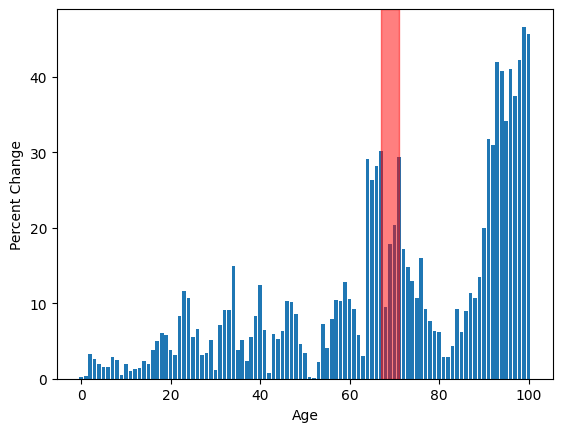

In [ ]:
census = census[census['AGE'] != 999]
# Age vs Percent Change Bar Plot

plt.bar(census['AGE'], abs(census['Percent Change']*100))
plt.xlabel('Age')
plt.ylabel('Percent Change')
plt.axvspan(67, 71, color='red', alpha=0.5)

plt.show()

In [ ]:
# I have SEX, AGE, 2010 population, 2014 population, Change, Percent Change, Analyse gender ratio of boys and girls among infants (age =0)

us_pop_2014 = analysis_df.drop(columns=['2010'])
infants = us_pop_2014[us_pop_2014['AGE'] == 0]
infants

,SEX,AGE,2014,Change,Percent Change
0,0,0,3949775,-1555,-0.000394
102,1,0,2020326,1906,0.000944
204,2,0,1929449,-3461,-0.001791


In [ ]:
#9. Analyse gender ratio of boys and girls among infants (age =0)

infants_2014 = infants['2014'].loc[0]

infants['Proportion'] = infants['2014']/infants_2014

infants.style.format({'Proportion':"{:.2%}"})

,SEX,AGE,2014,Change,Percent Change,Proportion
0,0,0,3949775,-1555,-0.000394,100.00%
102,1,0,2020326,1906,0.000944,51.15%
204,2,0,1929449,-3461,-0.001791,48.85%


In [ ]:
#10.Find years where the ratio of females to males ranged from 2 to 4.

us_pop_2014 = analysis_df.drop(columns=['2010'])
all_ages = us_pop_2014[us_pop_2014['AGE'] == 999]
all_ages

,SEX,AGE,2014,Change,Percent Change
101,0,999,318907401,9560538,0.030906
203,1,999,156955337,4867294,0.032003
305,2,999,161952064,4693244,0.029844


In [ ]:
pop_2014 = all_ages['2014'].iloc[0]

all_ages['Proportion'] = all_ages['2014']/pop_2014
all_ages.style.format({'Proportion':"{:.2%}"})

,SEX,AGE,2014,Change,Percent Change,Proportion
101,0,999,318907401,9560538,0.030906,100.00%
203,1,999,156955337,4867294,0.032003,49.22%
305,2,999,161952064,4693244,0.029844,50.78%


In [ ]:
gender_df = df[df['AGE'] == 999]

gender_df = gender_df.drop(columns=['AGE', 'CENSUS2010POP', 'ESTIMATESBASE2010'])

# Replace POPESTIMATE with "" across columns
gender_df.rename(columns=lambda x: x.replace('POPESTIMATE', ''), inplace=True)

gender_df

,SEX,2010,2011,2012,2013,2014,2015
101,0,309346863,311718857,314102623,316427395,318907401,321418820
203,1,152088043,153291772,154521077,155706770,156955337,158229297
305,2,157258820,158427085,159581546,160720625,161952064,163189523


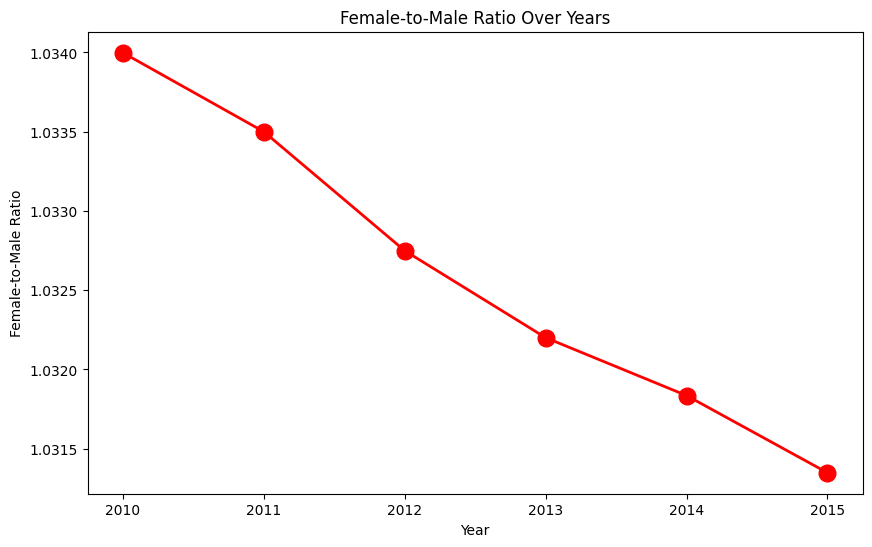

In [ ]:
# Iterate through the years. Gather the gender ratio for each year.
gender_ratio = []

for i in range(1, len(gender_df.columns)):
    year_data = gender_df[gender_df.columns[i]]
    male = year_data.iloc[1]/year_data.iloc[0]*100
    female = year_data.iloc[2]/year_data.iloc[0]*100

    gender_ratio.append((gender_df.columns[i], male, female, female/male))

# Gender ratio has list of tuples, where each tuple is (year, male, female, femaleToMaleRatio). Plot year vs femaleToMaleRatio.


# Extracting data for plotting
years = [entry[0] for entry in gender_ratio]
female_to_male_ratios = [entry[3] for entry in gender_ratio]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(years, female_to_male_ratios, marker='o', color='red', linewidth=2, markersize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Female-to-Male Ratio')
plt.title('Female-to-Male Ratio Over Years')

# Display the plot

plt.show()